In [16]:
using LinearAlgebra
using Plots

# Questão 1 do Lab

 Manipulando algebraicamente a expressão dada no site 
 http://www.if.ufrgs.br/tex/fis01043/20011/Adriano/intro.html,
 de modo que ela se assemelhe a um sistema linear,
 chegamos à seguinte expressão:

     t é o tempo decorrido
     Tf é a temperatura final
     T0 é a temperatura inicial
     k é a uma constante a ser determinada
     

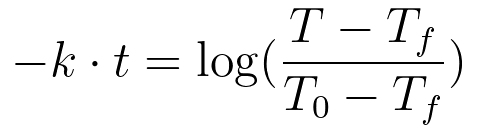


Chamando **-k** de **c**, e obtendo os valores de **Tf e T0**, podemos montar dois vetores:

    - O primeiro será "t", com os valores das horas em que foram realizadas medições de temperatura
    - O segundo será "b", com valores do lado direito da expressão dada para cada valor de temperatura medido


Assim, com esses vetores, poderemos montar um sistema linear tal que **tc=b**:


E então,usando o contrabarra como método de regressão, iremos achar o valor de **c**.
Em seguida, precisamos então ver qual valor de **t** satisfará a seguinte expressão, correspondente à temperatura de **37** graus no sistema:

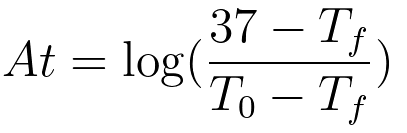
    

In [17]:
#Questão 1 do Lab
function f_log(T,T0,Tf)
    return log((T-Tf)/(T0-Tf))
end
#Determinando valores iniciais
T = [ 34,30,25 ]
T0 = 34
Tf = 20
b = [ f_log(i,T0,Tf) for i in T ] 
t = [0,1.5,2.5]
# Dado que At=b, para acharmos A:
c = t\b
resultado = c\(f_log(37,T0,Tf))

print("\nO crime ocorreu a ",resultado*60," minutos da chegada dos investigadores.\n",
        "Isto é, aproximadamente às 14h", Int(trunc(60 + resultado*60)))



O crime ocorreu a -32.162190991084906 minutos da chegada dos investigadores.
Isto é, aproximadamente às 14h27

# Questão 2 do lab

In [18]:

# Gerando aleatoriamente um polinomio de grau 5 com coeficientes inteiros entre -100 e 100.

coef = [ rand(-100:100) for i in 1:6 ]

# Gerando 30 valores aleatorios de x entre -10 e 10
x_values = [ (rand() * 10 * ((-1)^rand([1,2]) )) for i in 1:30]
x_values = sort(x_values)
k=0
nothing

Neste código, parece possível fazer a regressão para graus maiores que 29. 
    Mesmo com a matriz baixa.
	Erro para uma regressão de grau 50 = 1.6635575885462791e6



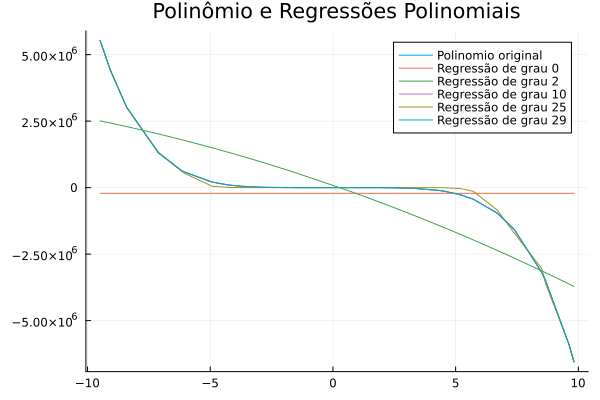

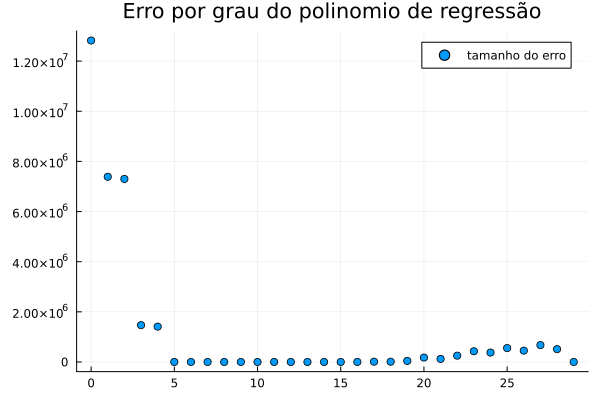

Vemos que o erro aumenta conforme ele se distância dos graus 5 e 29, onde chegam a praticamente 0. 
    Isto acontece porque no grau 5 ele é capaz de determinar exatamente os coeficientes do polinômio original.
    E no grau 29 a matriz de Vandermonde possui dimensões 30x30,não sendo mais alta
    e portanto representando um sistema linear, geralmente capaz de ser resolvido

In [19]:
#Questão 2 do lab



#  Funçao que retorna o valor de y para dado x do polinomio.
#  Recebe x e o valor dos coeficientes
    function pol_5(x,coeficientes)
        xs= [ x^i for i in 0:5 ]
        return xs'*coeficientes
    end

# Fazendo função que monta a matriz de Vandermonde para x e o grau dado.

    function vandermonde(x_values,grau)
        l = size(x_values)[1]
        c = grau+1
        vandermonde = zeros(l,c)
    
        for i in 1:l  #para cada linha
            for j in 1:c
                vandermonde[i,j] = x_values[i]^(j-1)
            end
        end
        return vandermonde
    end

# Funcao da regressão polinomial:
#retorna os valores de y para a regressao polinomial do grau dado (indice 1), e os coeficientes(indice 2).

    function reg_pol(grau,x_values,y_values)     
    # Regressão linear consiste em achar os (grau+1) coeficientes para os valores de x e y dado.
    # Para isso, precisamos de uma matriz de vandermond para os n valores de x com (grau+1) elementos em cada linha
        V = vandermonde(x_values,grau)
        coef = V\y_values
        result = [V*coef,coef]
        return result
    end


# Item 1)
# Gerando os 30 pontos (x,y)
    y_values = [ pol_5(x,coef) for x in x_values ]
    
    # Testando para valores de y com ruído
    
        # y_values_noise = [ (y +randn()*3) for y in y_values]
        # p = plot(x_values,y_values)
        # scatter!(x_values,y_values_noise)
        # display(p)
    

    # DEBUG: vendo se ele acerta os coeficientes para o caso do grau 5
    # display(reg_pol(5,x_values,y_values)[2])
    # display(coef)

#Item 2)
# Calculando os valores de y para a regressao de um polinomio de grau 0:29

    y_regvalues = []
    for i in 0:29
        push!(y_regvalues,reg_pol(i,x_values,y_values)[1])
    end

#Item 3)
    print("Neste código, parece possível fazer a regressão para graus maiores que 29. 
    Mesmo com a matriz baixa.")
    reg50 = reg_pol(50,x_values,y_values)[1]
    print("\n\tErro para uma regressão de grau 50 = ",(norm(y_values-reg50)),"\n\n")


    
# Analisando graficamente a regressao para grau 0,2,10,25,29
    p = plot(x_values,y_values,label="Polinomio original")
    for grau in [0,2,10,25,29]
        lb = string("Regressão de grau ", grau)
        plot!(x_values,y_regvalues[grau+1],label=lb)
    end
    plot!(title="Polinômio e Regressões Polinomiais")
    display(p)

# Item 4) Plotando os erros

    erros = [ norm(y_values-y_regvalues[i]) for i in 1:30]
    
    p = scatter(0:29,erros,label="tamanho do erro")
    plot!(title="Erro por grau do polinomio de regressão")
    display(p)
    print("Vemos que o erro aumenta conforme ele se distância dos graus 5 e 29, onde chegam a praticamente 0. 
    Isto acontece porque no grau 5 ele é capaz de determinar exatamente os coeficientes do polinômio original.
    E no grau 29 a matriz de Vandermonde possui dimensões 30x30,não sendo mais alta
    e portanto representando um sistema linear, geralmente capaz de ser resolvido")


# Questão 3 do laboratório



## Primeira modelagem

Inicialmente, pensei em modelar um sistema onde cada filme teria um coeficiente, que resolveria o sistema representado pelo número de votos em cada votação.
Isto nos daria uma matriz onde as colunas representariam os filmes, e as linhas as votações. Logo cada linha teria somente dois valores preenchidos, relativos ao resultado a votação entre 2 filmes. Isto nos daria uma Matriz alta, já que temos 14 votações para 13 filmes.

Infelizmente, os resultados não fizeram sentido!


In [20]:
strs = ["Toy Story","Rocky","BTTF","Curtindo a vida","Os incriveis","Duna","Batman Begins","Harry Potter","Shrek"]
# Construindo matrizes com votos por filme. 
    # Sendo cada linha uma votação. 
    filmes = [ 12 1 0 0 0 0 0 0 0;
            0 0 8 5 0 0 0 0 0;
            0 0 0 0 10 3 0 0 0;
            0 0 0 0 0 0 7 5 0;
            0 0 0 0 0 2 0 0 11
            0 3 0 0 0 0 0 10 0;
            9 0 4 0 0 0 0 0 0;
            0 0 0 0 9 0 0 4 0;
            0 0 0 7 0 5 0 0 0;
            0 0 7 0 0 5 0 0 0;
            0 1 0 0 0 0 0 0 12;
            0 0 0 0 9 0 4 0 0;
            8 0 0 0 0 0 5 0 0;
            0 0 0 3 0 0 10 0 0;]

# Vetor com a diferença de votos entre ganhador e perdedor
    b = [11;3;7;2;9;7;5;5;2;2;11;5;3;7]
# Pequena função para calcular e exibir os coeficientes de cada filme
    function reg_filme(strs,filmes,b)
        c = filmes\b
        valores = zip(c,strs)
        valores = sort(valores, rev=true)
        print("\tRanking dos filmes:\n")
        for i in valores
            print("\t\t $(i[2]) : $(round(i[1],digits=2))",'\n')
        end
        print("\n")
        return c
    end


# Primeira tentativam
    print("\nPrimeira tentativa, usando a matriz com os votos e a diferença entre eles.\n")
    reg_filme(strs,filmes,b)
    print("\n\tO que não faz muito sentido, pois Rocky não ganhou nenhuma votação e aparece como primeiro")



Primeira tentativa, usando a matriz com os votos e a diferença entre eles.
	Ranking dos filmes:
		 Rocky : 3.19
		 Shrek : 0.72
		 Os incriveis : 0.57
		 Toy Story : 0.48
		 Batman Begins : 0.41
		 Curtindo a vida : 0.31
		 BTTF : 0.18
		 Duna : 0.15
		 Harry Potter : -0.21


	O que não faz muito sentido, pois Rocky não ganhou nenhuma votação e aparece como primeiro

## Segunda modelagem

A segunda modelagem consistium em, para cada votação, criar uma equação que, para cada coeficiente C_f, relacionado a cada filme, se por acaso o filme 'A' ganhasse do filme 'B", teriamos:
- C_a - C_b = diferença dos votos de A para B na respectiva votação.


Isto, é, teremos uma matriz alta M com votações x filmes, onde cada linha tera um '1' no lugar do vencedor e '-1' no do perdedor.
Sendo b = a diferença de votos do vencedor para o perdedor em cada votação, queremos achar os coeficientes C_f tal que:
- M*C_f = b

E os coeficientes serão as pontuações dos filmes!

In [21]:

# Outra tentativa
    # Construindo matrizes substituindo os valores dos ganhadores para 1, e dos perdedores para -1
    # e usando a diferença entre os votos como vetor resultado
    m,n = size(filmes)
    filmes_2 = zeros(m,n)
    for i in 1:m*n
        if filmes[i] > 6
            filmes_2[i] = 1
            continue
        elseif filmes[i] > 0 && filmes[i]<7
            filmes_2[i]=-1
        end
    end
print("Matriz representando cada votação por filme: \n\t")
display(filmes_2)

print("\n\nResultando da segunda modelagem, substituindo os valores dos ganhadores para 1, e dos perdedores para -1 ( na matriz dos filmes) 
e usando a diferença entre os votos como vetor resultado na regressão linear. \n")
   c = reg_filme(strs,filmes_2,b)
print("Este resultado parece mais correto! Os incriveis ganhou todas as votações, seguido do Shrek, 
que não só ganhou todas em que participou,mas com uma grande margem. Justificando a sua primazia sobre Toy Story.")

Matriz representando cada votação por filme: 
	

14×9 Matrix{Float64}:
 1.0  -1.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0
 0.0   0.0   1.0  -1.0  0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0  1.0  -1.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0  0.0   0.0   1.0  -1.0  0.0
 0.0   0.0   0.0   0.0  0.0  -1.0   0.0   0.0  1.0
 0.0  -1.0   0.0   0.0  0.0   0.0   0.0   1.0  0.0
 1.0   0.0  -1.0   0.0  0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0  1.0   0.0   0.0  -1.0  0.0
 0.0   0.0   0.0   1.0  0.0  -1.0   0.0   0.0  0.0
 0.0   0.0   1.0   0.0  0.0  -1.0   0.0   0.0  0.0
 0.0  -1.0   0.0   0.0  0.0   0.0   0.0   0.0  1.0
 0.0   0.0   0.0   0.0  1.0   0.0  -1.0   0.0  0.0
 1.0   0.0   0.0   0.0  0.0   0.0  -1.0   0.0  0.0
 0.0   0.0   0.0  -1.0  0.0   0.0   1.0   0.0  0.0



Resultando da segunda modelagem, substituindo os valores dos ganhadores para 1, e dos perdedores para -1 ( na matriz dos filmes) 
e usando a diferença entre os votos como vetor resultado na regressão linear. 
	Ranking dos filmes:
		 Os incriveis : 4.9
		 Shrek : 4.75
		 Toy Story : 4.26
		 Batman Begins : 1.57
		 Harry Potter : -0.07
		 BTTF : -1.11
		 Curtindo a vida : -3.78
		 Duna : -3.81
		 Rocky : -6.69

Este resultado parece mais correto! Os incriveis ganhou todas as votações, seguido do Shrek, 
que não só ganhou todas em que participou,mas com uma grande margem. Justificando a sua primazia sobre Toy Story.

## Terceira Modelagem

Vimos, na segunda modelage, que o filme 'Shrek' ficou melhor colocado que 'Toy Story', que também obteve vitórias significativas (contra Rocky, com 11 votos de diferença).

Tal modelo, então, pode gerar algumas distorções para filmes que tenham participado de poucas votações. Uma forma, talvez, de resolver isto, é calcular cada score proporcionalmente ao numero de votações em que participou.

Ou seja, podemos pegar cada coeficiente e multiplicar pelo (numero de votações que o filme participou)/(numero de votações).

In [22]:
#Terceira modelagem
#Calculando
participacoes = zeros(9)
for i in 1:n
    cont = 0
    for j in filmes_2[:,i]
        if j !=0
            cont+=1
        end
    end
    participacoes[i] = cont
end
participacoes*=(1/m)
rank = Diagonal(c)*participacoes
rank = zip(rank,strs)
rank = sort(rank, rev=true)

   print("\tRanking dos filmes:\n")
        for i in rank
            print("\t\t $(i[2]) : $(round(i[1],digits=2))",'\n')
        end

print("\n\nE aqui vemos que Toy Story ficou acima de Shrek.")

	Ranking dos filmes:
		 Os incriveis : 1.05
		 Toy Story : 0.91
		 Shrek : 0.68
		 Batman Begins : 0.45
		 Harry Potter : -0.02
		 BTTF : -0.24
		 Curtindo a vida : -0.81
		 Duna : -1.09
		 Rocky : -1.43


E aqui vemos que Toy Story ficou acima de Shrek.

# Questão 4 do lab

Explicações no código!


	Abaixo, temos o gráfico do peso pelo dia! (considerando as medições no ano de 2023)



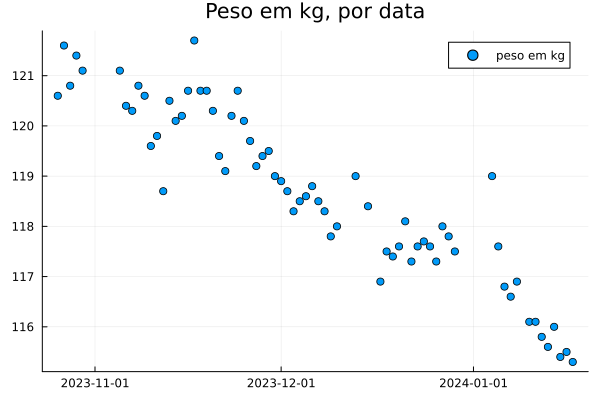


	Aqui, aplicamos uma regressão linear, e temos uma visualização do modelo,
    que vai até o dia em que o peso atinge a marca dos 110kg. 


	 Que é no dia 2024-04-01, April 1 2024 !

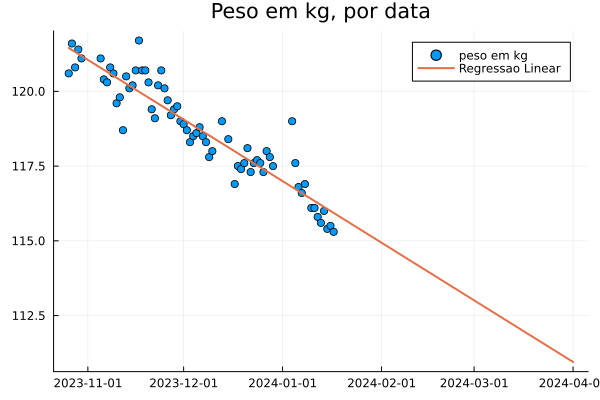

In [23]:
# Questão 4 do lab)

using Dates


#Construindo lista de datas:
# Funcao auxiliar pra construção das datas
    function add_dias_mes_ano(range_dias,mes,ano,lista)
        for dia in range_dias
            push!(lista,Date(ano,mes,dia))
        end
    end
# Aqui, construiremos o vetor 'datas' com todas as datas em que o peso FOI MEDIDO!
    datas= []
    add_dias_mes_ano(26:30,10,2023,datas)
    add_dias_mes_ano(5:30,11,2023,datas)
    add_dias_mes_ano(1:10,12,2023,datas)
    add_dias_mes_ano([13,15],12,2023,datas)
    add_dias_mes_ano(17:29,12,2023,datas)
    add_dias_mes_ano(4:8,1,2024,datas)
    add_dias_mes_ano(10:17,1,2024,datas)

# Aqui, datas_totais serão TODAS AS DATAS desde a PRIMEIRA MEDIÇÂO até a ÙLTIMA!
    datas_totais = [ i for i in Date(2023,10,26):Day(1):Date(2024,1,17)]
# Definindo pesos
    pesos = [120.6, 121.6, 120.8, 121.4, 121.1, 121.1, 120.4, 120.3, 120.8,
    120.6, 119.6, 119.8, 118.7, 120.5, 120.1, 120.2, 120.7, 121.7, 120.7,
    120.7, 120.3, 119.4, 119.1, 120.2, 120.7, 120.1, 119.7, 119.2, 119.4, 
    119.5, 119.0, 118.9, 118.7, 118.3, 118.5, 118.6, 118.8, 118.5, 118.3, 
    117.8, 118.0, 119.0, 118.4, 116.9, 117.5, 117.4, 117.6, 118.1, 117.3, 
    117.6, 117.7, 117.6, 117.3, 118.0, 117.8, 117.5, 119.0, 117.6, 116.8, 
    116.6, 116.9, 116.1, 116.1, 115.8, 115.6, 116.0, 115.4, 115.5, 115.3]

# Note que uso a biblioteca Dates para depois, na construção do gráfico, plotar o peso com o dia!
    # Esses dois arrays me ajudarão a, também, associar cada dia a um valor, como farei abaixo.


# Contando os dias e construindo array com valores que representarão os dias, para facilitar os calculos.

# Exemplo: O primeiro dia, 26/10, será 1, e 27/10 será 2, por exemplo. Alguns dias ficarão vazios.
# No fim, estes valores dos dias serão os valores de "x" para o peso "y" medido naquele dia.

    i=1
    d = 1
    x_values = zeros(69,1)
    for dia in datas_totais
        if dia in datas
            x_values[i]=d
            i+=1
        end
        d+=1
    end
    p = scatter(datas,pesos,label = "peso em kg")
    plot!(title="Peso em kg, por data")
    print("\n\tAbaixo, temos o gráfico do peso pelo dia! (considerando as medições no ano de 2023)\n\n")
    display(p)

# Como temos valores de x(dias) e os pesos medidos (y), podemos fazer uma regressão linear!

# Fazendo uma regressao linear, e estendendo os valores de dias onde serão calculado os pesos
    regressao = reg_pol(1,x_values,pesos)
    # O vetor abaixo terá todo o intervalo de dias contados desde o primeiro até o último.
    total_x_values = Array(1:(length(datas_totais)))
# Calculando o  dia em que o peso chega à 110kg:

    print("\n\tAqui, aplicamos uma regressão linear, e temos uma visualização do modelo,
    que vai até o dia em que o peso atinge a marca dos 110kg. \n\n")
    # Calcular o peso desde o último dia, e acrescentar dias até que o peso se torne <=111.

    dia  = last(total_x_values)
    v = vandermonde([dia],1)
    peso = v*regressao[2]
    while peso[1] > 111
        dia+=1
        #colocando +1 data e +1 dia
        push!(datas_totais,last(datas_totais)+Day(1))
        push!(total_x_values,dia)
        #calculando peso
        v=vandermonde([dia],1)
        peso = v*regressao[2]
    end

    dia = last(datas_totais)
    print("\n\t Que é no dia ",dia,", ",Dates.monthname(dia),' ',Dates.day(dia),' ',Dates.year(dia)," !")
    # Plotando a regressão 
    peso = vandermonde(total_x_values,1)*regressao[2]
    p = scatter(datas,pesos,label = "peso em kg")
    plot!(title="Peso em kg, por data")
    plot!(datas_totais,peso,lw=2,label="Regressao Linear ")

# Interpolações polinomiais

Os dois códigos estão abaixo. Utilizei os mesmos pontos para a interpolação coma igualdade da 2ª derivada e para a tangente no ponto 1 = 0.

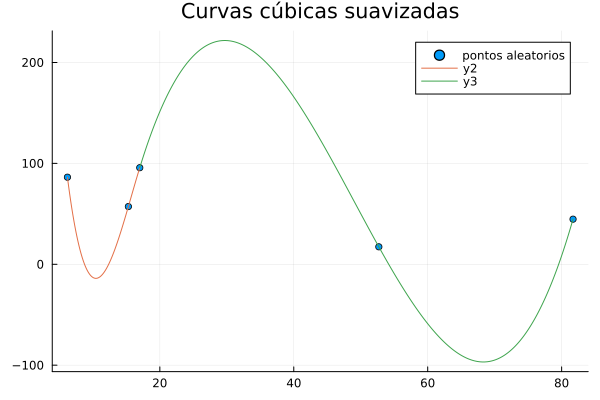


	No caso de querermos que  inclinação da tangente no ponto inicial  seja 0, teremos:



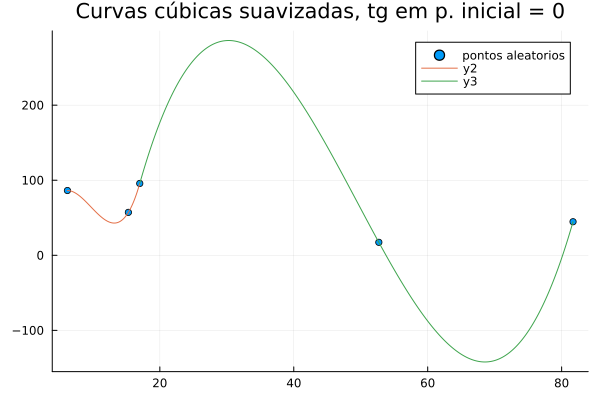

In [24]:

#Caso da primeira e segunda derivadas das interpolações sejam = 0
    n_pontos = 5
    grau = 3
    x_values = [ rand(0:0.1:100) for i in 1:n_pontos]
    x_values = sort(x_values)
    y_values = [ rand(0:0.1:100) for i in 1:n_pontos]
    p = plot(title="Curvas cúbicas suavizadas")
    scatter!(x_values,y_values,markersize=3.5,label="pontos aleatorios")
    
    #criando matriz com 0s do tamanho adequado 
    M = zeros(8,8)
    
    #Matriz de vandermonde para a primeira interpolacao
    x1 = x_values[1:3,:]
    y1= y_values[1:3,:]
    v1 = vandermonde(x1,grau)

    #tamanho das matrizes de Vandermonde, para montar na matriz M
    lv,cv = size(v1)

        #colocando-a na matriz M
        i = 1
        for j in 1:lv
            M[i,1:cv] = v1[j,:]
            i+=1
        end
            
    #Matriz de vandermonde para a segunda interpolacao
    x2 = x_values[3:5]
    y2 = y_values[3:5]
    v2 = vandermonde(x2,grau)
     #colocando-a na matriz M
    
    for j in 1:lv
        M[i,cv+1:2*cv] = v2[j,:]
        i+=1
    end
    #adicionando restricoes para derivadas
    ponto_comum = last(x1)
    linha_dx1 = [0;1;2*ponto_comum;3*(ponto_comum^2);0;-1;-2*ponto_comum;-3*(ponto_comum^2)]
    linha_dx2 = [0;0;2;6*ponto_comum;0;0;-2;-6*ponto_comum]
    M[i,:] = linha_dx1
    i+=1
    M[i,:] = linha_dx2
    
    #Criando vetor do lado direito da igualdade M*c=b
    b = zeros(8,)
        #colocando pontos de x em b:
        b[1:3] = y1
        b[4:6] = y2
            # display(M)
            # display(b)
    
    # fazendo a interpolacao
    coefs = M\b
        #pegando coeficientes de cada interpolacao
    c1 = coefs[1:4]
    c2 = coefs[5:8]
    #Plotando a primeira interpolacao
    x_plot1 = [ i for i in x1[1]:0.1:last(x1) ]
    
    plot!(x_plot1,vandermonde(x_plot1,grau)*c1)
    
    #plotando segunda interpolacao
    x_plot2 = [ i for i in x2[1]:0.1:last(x2) ]
    
    plot!(x_plot2,vandermonde(x_plot2,grau)*c2)
    display(p)


# CASO PONTO INICIAL TENHA INCLINAÇÃO DA RETA TANGENTE = 0

        print("\n\tNo caso de querermos que  inclinação da tangente no ponto inicial  seja 0, teremos:\n\n")
    #Colocando a linha de restriçao na última linha da matriz.
        linha_dxi = [0;1;2*x1[1];3*(x1[1]^2);0;0;0;0]
        
        M[8,:] = linha_dxi
    
    # fazendo a interpolacao
        coefs = M\b
        
    #pegando coeficientes de cada interpolacao
        c1 = coefs[1:4]
        c2 = coefs[5:8]
    
    #Plotando
        p = plot(title="Curvas cúbicas suavizadas, tg em p. inicial = 0")
        scatter!(x_values,y_values,markersize=3.5,label="pontos aleatorios")
    #Plotando a primeira interpolacao
        x_plot1 = [ i for i in x1[1]:0.1:last(x1) ]
        
        plot!(x_plot1,vandermonde(x_plot1,grau)*c1)
    
    #plotando segunda interpolacao
        x_plot2 = [ i for i in x2[1]:0.1:last(x2) ]
    
        plot!(x_plot2,vandermonde(x_plot2,grau)*c2)

# Questão 38 da lista
Justificativas na própria celula/output da célula.

In [25]:
# EXERCICIO 38 DA LISTA


# Item a)
print("EXERCICIO 38 DA LISTA\n\nSeja o vetor abaixo aquele que indica, para cada linha, os defensores da republica e da monarquia desde o começo da \"aferição\".
Consideraremos 1000 republicanos e 800 monarquistas inicialmente. \n\n")
p = [1000;1000]
display(p)
print("\n\nPara cada ano, teremos que:
        - o nº de republicanos se torna 70% de seu valor anterior + 20% dos monarquistas anteriores
        - o nº de monarquistas se torna 80% de seu valor anterior + 30% dos republicanos anteriores.
\n tais transformações, representadas em uma matriz, seriam como a seguinte:\n\n")
M = [0.7 0.2;
     0.3 0.8]
display(M)

print("\nE aplicar esta transformação no vetor anterior, com o número inicial de partidários, significaria o avanço de 1 ano.
Temos então um modelo iterativo.")

# Código para iteração será:
function itera(A,b,k)
    resultado = Vector{Float64}(b)
    lista = [resultado]
    for i in 1:k
        resultado = A*resultado
        push!(lista,resultado)
    end
    return lista
end

#Item b)

# calculando partidarios depois de 10 anos:

historico = itera(M,p,10)
p10 = historico[11]

print("\n\nITEM b) \n\nConsiderando a mesma população da questão acima (1000 para cada posição política),
temos, em 10 anos o cenário de: ",
    "\n\t- ",round(p10[1])," republicanos.",
    "\n\t- ",round(p10[2])," monarquistas.")
pct = 800/2000
print("\nCom republicanos representando ",pct*100,"% da população")

# Item c) 

println("\n\nITEM C)\n\nA longo prazo, a proporção de republicanos e monarquistas será
a proporção existente entre os valores do autovetor da Matriz que esteja associado ao autovetor de valor >=1 .
Checando os autovalores e autovetores:")
#checando autovalores e vetores
aval,avet = eigen(M)
for i in 1:2
    println("\n\tAutovetor_",i,"= ",avet[:,i],"\tassociado ao valor ",aval[i] )
end

println("\n Logo teremos o autovetor_2 nos indicando a proporção existente entre republicanos e monarquistas.
Teremos ", avet[:,2][1]/(avet[:,2][1]+avet[:,2][2])*100,"% de monarquistas a longo prazo. E 60% de monarquistas")


EXERCICIO 38 DA LISTA

Seja o vetor abaixo aquele que indica, para cada linha, os defensores da republica e da monarquia desde o começo da "aferição".
Consideraremos 1000 republicanos e 800 monarquistas inicialmente. 



2-element Vector{Int64}:
 1000
 1000



Para cada ano, teremos que:
        - o nº de republicanos se torna 70% de seu valor anterior + 20% dos monarquistas anteriores
        - o nº de monarquistas se torna 80% de seu valor anterior + 30% dos republicanos anteriores.

 tais transformações, representadas em uma matriz, seriam como a seguinte:



2×2 Matrix{Float64}:
 0.7  0.2
 0.3  0.8


E aplicar esta transformação no vetor anterior, com o número inicial de partidários, significaria o avanço de 1 ano.
Temos então um modelo iterativo.

ITEM b) 

Considerando a mesma população da questão acima (1000 para cada posição política),
temos, em 10 anos o cenário de: 
	- 800.0 republicanos.
	- 1200.0 monarquistas.
Com republicanos representando 40.0% da população

ITEM C)

A longo prazo, a proporção de republicanos e monarquistas será
a proporção existente entre os valores do autovetor da Matriz que esteja associado ao autovetor de valor >=1 .
Checando os autovalores e autovetores:

	Autovetor_1= [-0.7071067811865476, 0.7071067811865475]	associado ao valor 0.5

	Autovetor_2= [-0.5547001962252291, -0.8320502943378437]	associado ao valor 1.0

 Logo teremos o autovetor_2 nos indicando a proporção existente entre republicanos e monarquistas.
Teremos 40.0% de monarquistas a longo prazo. E 60% de monarquistas


# Questão 39 da Lista
Justificativas na célula/output.

EXERCICIO 39 DA LISTA

Item a)
    Teremos um vetor 'p' de 3 coordenadas, cada uma delas representando a quantidade de bactérias em cada 'faixa etária'.
    A matriz M representa as operações que determinam quantas bactérias estão em cada faixa etária a cada mês,
    que depende do número de bactérias em cada estágio, no mês atual.
    A matriz M será:


3×3 Matrix{Float64}:
 0.0  0.5  0.2
 0.8  0.0  0.0
 0.0  0.5  0.0



Item b)
    
    Realizando 5 interações, teremos o seguinte histórico 
    


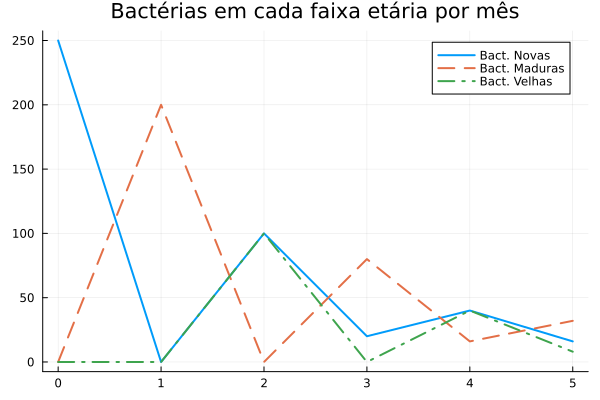



ITEM C)

Farei um gráfico para as proporções de cada faixa etária em cada mês:

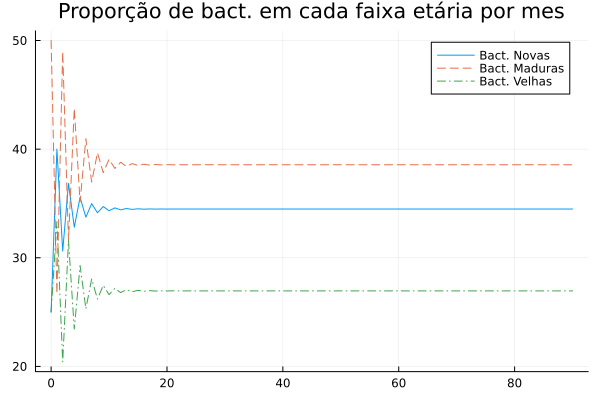

Isto é, depois de 90 meses, teremos:
Novas: 34.48257589727611%
Maduras: 38.57317572050217%
Velhas: 26.94424838222171%

Na verdade podemos observar que este é a proporção entre as coordenadas do autovetor de M 
que associado ao maior autovalor.
Isto ocorre porquê como este valor é o maior, ele tende a 0 mais devagar que os outros 2,
portanto as proporções costumam estabilizar ao redor dele.
    
    Autovetores e autovalores associados para a matriz M :
	Autovetor associado ao valor -0.4847244279981398: 


3-element Vector{Float64}:
 -0.38859723981288297
  0.6413495460383513
 -0.6615609911460995


	Autovetor associado ao valor -0.2306934610291525: 


3-element Vector{Float64}:
  0.11993768981399616
 -0.4159205528546464
  0.9014571782814573


	Autovetor associado ao valor 0.7154178890272924: 


3-element Vector{Float64}:
 0.591187635549623
 0.6610823068496908
 0.4620252840955107

In [26]:
#EXERCICIO 39 DA LISTA

println("EXERCICIO 39 DA LISTA

Item a)
    Teremos um vetor 'p' de 3 coordenadas, cada uma delas representando a quantidade de bactérias em cada 'faixa etária'.
    A matriz M representa as operações que determinam quantas bactérias estão em cada faixa etária a cada mês,
    que depende do número de bactérias em cada estágio, no mês atual.
    A matriz M será:")
M = [ 0 1/2 1/5 ;
     4/5 0 0 ;
    0 1/2 0]
display(M)

println("\n\nItem b)
    
    Realizando 5 interações, teremos o seguinte histórico 
    ")
p = [ 250 ; 0;0]
qtd_meses = 5
historico = itera(M,p,qtd_meses)


p = plot()
str = ["Bact. Novas","Bact. Maduras","Bact. Velhas"]
y_values = []
estilo = [:solid,:dash,:dashdot]
for i in 1:3
    #obter lista de valores para cada faixa etária
    lista = []
    for mes in historico
        push!(lista,mes[i])
    end
    push!(y_values,lista)
    plot!(0:qtd_meses,y_values[i],lw=2,label=str[i],ls=estilo[i])
end
plot!(title="Bactérias em cada faixa etária por mês")
display(p)

# ITEM C
print("\n\nITEM C)

Farei um gráfico para as proporções de cada faixa etária em cada mês:")
p = [100;200;100]
qtd_meses = 90
historico = itera(M,p,qtd_meses)


#Fazendo lista de proporcoes por faixa etaria
proporcoes = [[],[],[]]
for mes in historico
    total = sum(mes)
    for i in 1:3
        push!(proporcoes[i],mes[i]/total*100)
    end
end

p = plot(title="Proporção de bact. em cada faixa etária por mes")
for i in 1:3
    plot!(0:qtd_meses,proporcoes[i],label=str[i],ls=estilo[i])
end
display(p)
aval,avet = eigen(M)
print("Isto é, depois de $qtd_meses meses, teremos:
Novas: $(proporcoes[1][21])%
Maduras: $(proporcoes[2][21])%
Velhas: $(proporcoes[3][21])%

Na verdade podemos observar que este é a proporção entre as coordenadas do autovetor de M 
que associado ao maior autovalor.
Isto ocorre porquê como este valor é o maior, ele tende a 0 mais devagar que os outros 2,
portanto as proporções costumam estabilizar ao redor dele.
    
    Autovetores e autovalores associados para a matriz M :")
for i in 1:3
    println("\n\tAutovetor associado ao valor ",aval[i],": " )
    display(avet[:,i])
end
